In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation,GlobalAveragePooling1D,LeakyReLU
from tensorflow.keras.applications import vgg19
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import time
import matplotlib.pyplot as plt

In [ ]:

#import pandas as pd
# Load mnist data
def load_data():
    (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data() # normalise to range [-1,1]
    x_train = (x_train.astype (np.float32) - 127.5)/127.5
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,x_test, y_test) = load_data()
print(X_train.shape)

(60000, 784)


In [ ]:
def create_generator():
    generator=Sequential()
    generator.add(Dense (256, activation="relu", input_dim=100)) 
    generator.add(Dense(512, activation="relu"))
    generator.add(Dense (1024, activation="relu"))
    generator.add(Dense (784, activation= 'tanh'))
    generator.compile(loss='binary_crossentropy', optimizer='adam')
    return generator

g=create_generator() 
g.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 256)               25856     
                                                                 
 dense_53 (Dense)            (None, 512)               131584    
                                                                 
 dense_54 (Dense)            (None, 1024)              525312    
                                                                 
 dense_55 (Dense)            (None, 784)               803600    
                                                                 
Total params: 1,486,352
Trainable params: 1,486,352
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(1024, activation="relu", input_dim=784)) 
    discriminator.add(Dropout(0.3)) 
    discriminator.add(Dense(512, activation="relu"))
    discriminator.add(Dropout(0.3))
    discriminator.add(Dense(256, activation="relu"))
    discriminator.add(Dense(1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer='adam')
    return discriminator

d =create_discriminator()
d.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_14 (Dropout)        (None, 1024)              0         
                                                                 
 dense_57 (Dense)            (None, 512)               524800    
                                                                 
 dropout_15 (Dropout)        (None, 512)               0         
                                                                 
 dense_58 (Dense)            (None, 256)               131328    
                                                                 
 dense_59 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1,460,225
Trainable params: 1,460,225
N

In [ ]:
from tensorflow.keras import Input, Model

def create_gan(discriminator, generator): 
    discriminator.trainable=False
    gan_input = Input(shape=(100,)) 
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan


gan = create_gan(d,g)
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 784)               1486352   
                                                                 
 sequential_2 (Sequential)   (None, 1)                 1460225   
                                                                 
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


937
Epoch 1
4/4 [==============================] - 1s 327ms/step


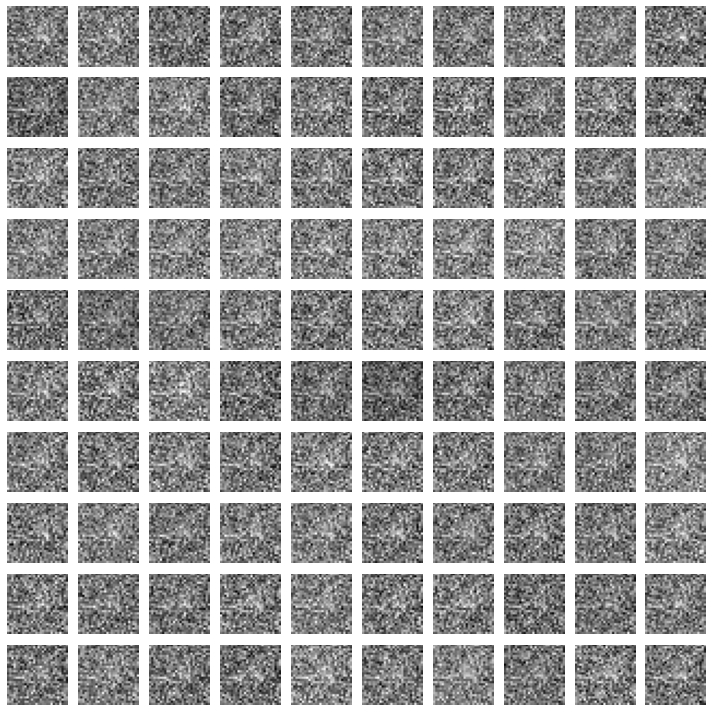

Epoch 2
2/2 [==============================] - 0s 14ms/step - loss: 1.0811
Epoch 3
2/2 [==============================] - 0s 14ms/step - loss: 3.1841
Epoch 4
2/2 [==============================] - 0s 185ms/step - loss: 3.6298
Epoch 5
2/2 [==============================] - 0s 14ms/step - loss: 0.8553
Epoch 6
2/2 [==============================] - 0s 13ms/step - loss: 3.3659
Epoch 7
2/2 [==============================] - 0s 13ms/step - loss: 4.8574
Epoch 8
2/2 [==============================] - 0s 8ms/step - loss: 4.2109
Epoch 9
2/2 [==============================] - 0s 13ms/step - loss: 1.7313
Epoch 10
2/2 [==============================] - 0s 9ms/step - loss: 1.4872
Epoch 11
2/2 [==============================] - 0s 13ms/step - loss: 2.7454
Epoch 12
2/2 [==============================] - 0s 489ms/step - loss: 6.0671
Epoch 13
2/2 [==============================] - 0s 13ms/step - loss: 5.2622
Epoch 14
2/2 [==============================] - 0s 9ms/step - loss: 5.5618
Epoch 15
2/2 [=======

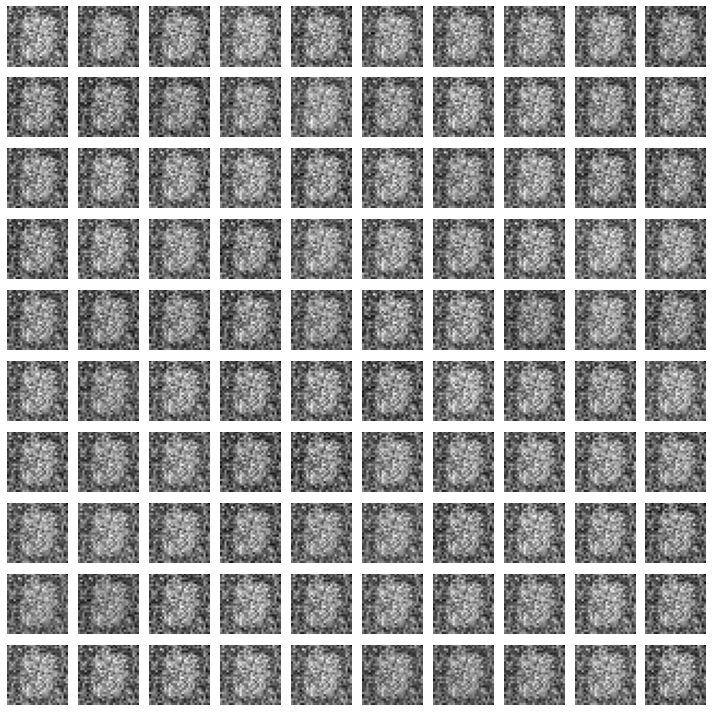

Epoch 21
2/2 [==============================] - 1s 592ms/step - loss: 5.6398
Epoch 22
2/2 [==============================] - 1s 672ms/step - loss: 5.3255
Epoch 23
2/2 [==============================] - 0s 17ms/step - loss: 6.2282
Epoch 24
2/2 [==============================] - 0s 13ms/step - loss: 4.7547
Epoch 25
2/2 [==============================] - 0s 16ms/step - loss: 3.3635
Epoch 26
2/2 [==============================] - 0s 19ms/step - loss: 3.2819
Epoch 27
2/2 [==============================] - 0s 16ms/step - loss: 6.3870
Epoch 28
2/2 [==============================] - 0s 18ms/step - loss: 17.9720
Epoch 29
2/2 [==============================] - 0s 16ms/step - loss: 3.9326
Epoch 30
2/2 [==============================] - 0s 17ms/step - loss: 3.0729
Epoch 31
2/2 [==============================] - 0s 183ms/step - loss: 2.5646
Epoch 32
2/2 [==============================] - 0s 9ms/step - loss: 0.5801
Epoch 33
2/2 [==============================] - 0s 13ms/step - loss: 0.7689
Epoch 34


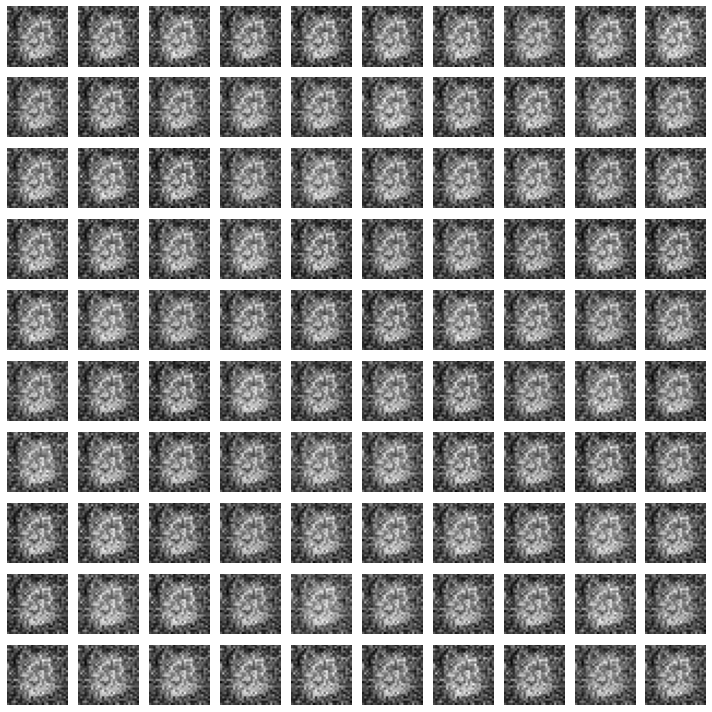

Epoch 41
2/2 [==============================] - 0s 9ms/step - loss: 1.6234
Epoch 42
2/2 [==============================] - 0s 13ms/step - loss: 5.9623
Epoch 43
2/2 [==============================] - 0s 16ms/step - loss: 4.4526
Epoch 44
2/2 [==============================] - 0s 13ms/step - loss: 5.6006
Epoch 45
2/2 [==============================] - 0s 14ms/step - loss: 2.1720
Epoch 46
2/2 [==============================] - 0s 9ms/step - loss: 8.4485
Epoch 47
2/2 [==============================] - 0s 10ms/step - loss: 8.3984
Epoch 48
2/2 [==============================] - 0s 8ms/step - loss: 7.4336
Epoch 49
2/2 [==============================] - 0s 15ms/step - loss: 7.0501
Epoch 50
2/2 [==============================] - 0s 16ms/step - loss: 8.8588
Epoch 51
2/2 [==============================] - 0s 10ms/step - loss: 2.2043
Epoch 52
2/2 [==============================] - 0s 7ms/step - loss: 2.2116
Epoch 53
2/2 [==============================] - 0s 17ms/step - loss: 9.5118
Epoch 54
2/2 [==

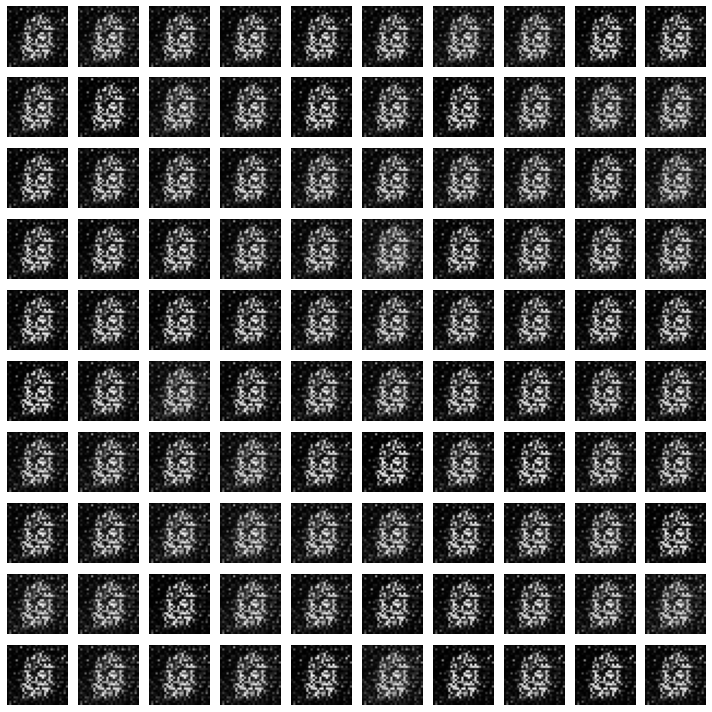

Epoch 61
2/2 [==============================] - 0s 7ms/step - loss: 12.3291
Epoch 62
2/2 [==============================] - 0s 9ms/step - loss: 17.6931
Epoch 63
2/2 [==============================] - 0s 11ms/step - loss: 10.1146
Epoch 64
2/2 [==============================] - 0s 15ms/step - loss: 4.3821
Epoch 65
2/2 [==============================] - 0s 17ms/step - loss: 1.1214
Epoch 66
2/2 [==============================] - 0s 9ms/step - loss: 2.8670
Epoch 67
2/2 [==============================] - 0s 14ms/step - loss: 1.1753
Epoch 68
2/2 [==============================] - 0s 18ms/step - loss: 2.8286
Epoch 69
2/2 [==============================] - 0s 10ms/step - loss: 6.3414
Epoch 70
2/2 [==============================] - 0s 11ms/step - loss: 6.9184
Epoch 71
2/2 [==============================] - 0s 13ms/step - loss: 12.8555
Epoch 72
2/2 [==============================] - 1s 863ms/step - loss: 5.1073
Epoch 73
2/2 [==============================] - 0s 19ms/step - loss: 13.4092
Epoch 74


KeyboardInterrupt: ignored

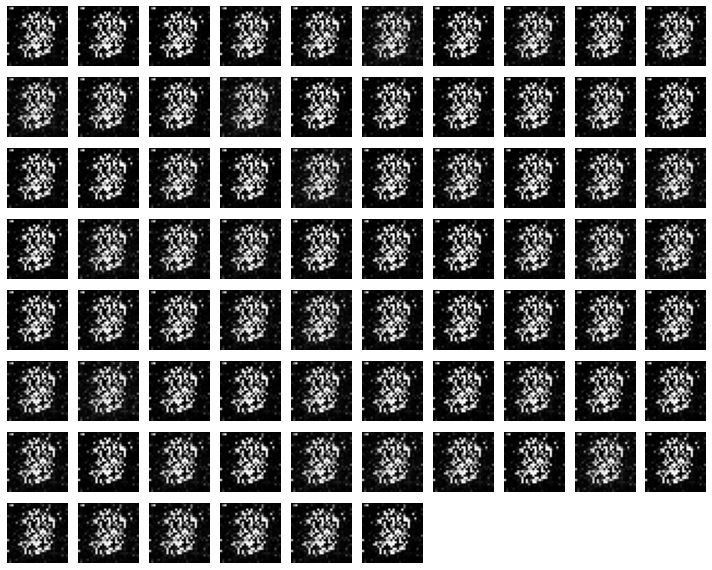

In [ ]:
def training (epochs=1, batch_size=128):
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    #Used to train on batches
    batch_count = int(np.ceil(X_train.shape[0] / batch_size)) -1 
    print(batch_count)
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator() 
    gan = create_gan(discriminator, generator)


    for e in range(1, epochs+1): 
        print("Epoch %d" %e)
        for _ in (range(batch_size)):
            #generate random noise as an input to initialize the generator 
            noise= np.random.normal(0,1, [batch_size, 100])

            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)

            # Get set of real images
            #image_batch =x_train[index* batch_size:(index+1) * batch_size]
            # Get a random set of real images
            image_batch = X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]

            #Construct different batches of real and fake data
            X= np.concatenate([image_batch, generated_images])

            # Labels for generated and real data 0:fake and 1:real 
            y_dis=np.zeros(2*batch_size) 
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on fake and real data before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)

            #Tricking the noised input of the Generator as real data, set fake data to 1 
            noise = np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones (batch_size)

            # During the training of gan,
            #  the weights of discriminator should be freezed.
            #We can enforce that by setting the trainable flag 
            discriminator.trainable=False
            #training the GAN by alternating the training of the Discriminator
            #and training the chained GAN model with Discriminator's weights freezed. 
            gan.train_on_batch (noise, y_gen)
        if e == 1 or e % 20 == 0:
            plot_generated_images (e, generator)

training(1000,64)

4/4 [==============================] - 0s 156ms/step


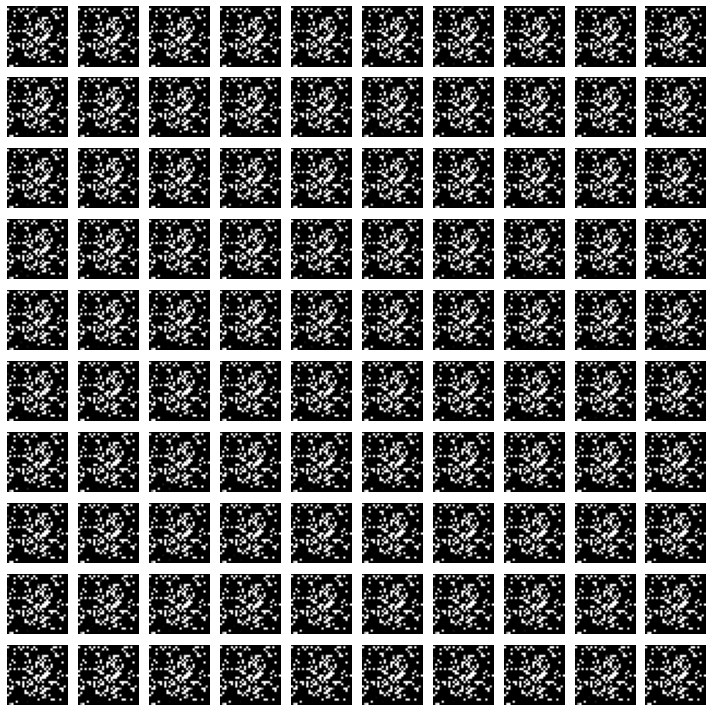

In [ ]:
def plot_generated_images (epoch, generator, examples=100, dim=(10,10), figsize=(10,10)): 
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100]) 
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28,28) 
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]): 
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], cmap='gray')
        plt.axis('off')
        plt.tight_layout()
    plt.show()

plot_generated_images(1,generator)